## Notebook 10: 

This is an IPython notebook. Most of the code is composed of bash scripts, indicated by %%bash at the top of the cell, otherwise it is IPython code. This notebook includes code to download, assemble and analyze a published RADseq data set.

In [2]:
### Notebook 10
### Data set 10: Pedicularis
### Authors: Eaton & Ree 2013
### Data Location: SRP021469

## Download the sequence data
Sequence data for this study are archived on the NCBI sequence read archive (SRA). Below I read in SraRunTable.txt for this project which contains all of the information we need to download the data. 

+ SRA link: http://trace.ncbi.nlm.nih.gov/Traces/study/?acc=SRP021469

In [1]:
%%bash
## make a new directory for this analysis
mkdir -p empirical_10/fastq/

#### For each ERS (individuals) get all of the ERR (sequence file accessions).

In [2]:
## IPython code
import pandas as pd
import numpy as np
import urllib2
import os

## open the SRA run table from github url
url = "https://raw.githubusercontent.com/"+\
      "dereneaton/RADmissing/master/empirical_10_SraRunTable.txt"
intable = urllib2.urlopen(url)
indata = pd.read_table(intable, sep="\t")

## print first few rows
print indata.head()

    BioSample_s Experiment_s          Library_Name_s  MBases_l  MBytes_l  \
0  SAMN01998191    SRX271152           29154_superba        49        26   
1  SAMN01999096    SRX840097            30556_thamno       102        55   
2  SAMN01998194    SRX840089  41954_cyathophylloides       155        86   
3  SAMN01998193    SRX840088  41478_cyathophylloides       155        82   
4  SAMN01999094    SRX840095               39618_rex        58        32   

                     Organism_s       Run_s SRA_Sample_s  \
0           Pedicularis superba  SRR1754715    SRS415733   
1       Pedicularis thamnophila  SRR1754720    SRS816842   
2  Pedicularis cyathophylloides  SRR1754721    SRS816834   
3  Pedicularis cyathophylloides  SRR1754722    SRS816833   
4               Pedicularis rex  SRR1754723    SRS816841   

            Sample_Name_s  is_reference_s       ...       LibraryLayout_s  \
0           29154_superba  <not provided>       ...                SINGLE   
1            30556_thamno   

In [3]:
def wget_download(SRR, outdir, outname):
    """ Python function to get sra data from ncbi and write to
    outdir with a new name using bash call wget """
    
    ## get output name
    output = os.path.join(outdir, outname+".sra")
    
    ## create a call string 
    call = "wget -q -r -nH --cut-dirs=9 -O "+output+" "+\
           "ftp://ftp-trace.ncbi.nlm.nih.gov/"+\
           "sra/sra-instant/reads/ByRun/sra/SRR/"+\
           "{}/{}/{}.sra;".format(SRR[:6], SRR, SRR)
        
    ## call bash script
    ! $call 

Here we pass the SRR number and the sample name to the `wget_download` function so that the files are saved with their sample names. 

In [4]:
for ID, SRR in zip(indata.Sample_Name_s, indata.Run_s):
    wget_download(SRR, "empirical_10/fastq/", ID)

In [5]:
%%bash
## convert sra files to fastq using fastq-dump tool
## output as gzipped into the fastq directory
fastq-dump --gzip -O empirical_10/fastq/ empirical_10/fastq/*.sra

## remove .sra files
rm empirical_10/fastq/*.sra

Read 696994 spots for empirical_10/fastq/29154_superba.sra
Written 696994 spots for empirical_10/fastq/29154_superba.sra
Read 1452316 spots for empirical_10/fastq/30556_thamno.sra
Written 1452316 spots for empirical_10/fastq/30556_thamno.sra
Read 1253109 spots for empirical_10/fastq/30686_cyathophylla.sra
Written 1253109 spots for empirical_10/fastq/30686_cyathophylla.sra
Read 964244 spots for empirical_10/fastq/32082_przewalskii.sra
Written 964244 spots for empirical_10/fastq/32082_przewalskii.sra
Read 636625 spots for empirical_10/fastq/33413_thamno.sra
Written 636625 spots for empirical_10/fastq/33413_thamno.sra
Read 1002923 spots for empirical_10/fastq/33588_przewalskii.sra
Written 1002923 spots for empirical_10/fastq/33588_przewalskii.sra
Read 1803858 spots for empirical_10/fastq/35236_rex.sra
Written 1803858 spots for empirical_10/fastq/35236_rex.sra
Read 1409843 spots for empirical_10/fastq/35855_rex.sra
Written 1409843 spots for empirical_10/fastq/35855_rex.sra
Read 1391175 spo

In [6]:
%%bash
ls -lh empirical_10/fastq/

total 1.1G
-rw-rw-r-- 1 deren deren  42M Dec 17 20:49 29154_superba.fastq.gz
-rw-rw-r-- 1 deren deren  86M Dec 17 20:49 30556_thamno.fastq.gz
-rw-rw-r-- 1 deren deren  80M Dec 17 20:49 30686_cyathophylla.fastq.gz
-rw-rw-r-- 1 deren deren  58M Dec 17 20:49 32082_przewalskii.fastq.gz
-rw-rw-r-- 1 deren deren  40M Dec 17 20:49 33413_thamno.fastq.gz
-rw-rw-r-- 1 deren deren  61M Dec 17 20:49 33588_przewalskii.fastq.gz
-rw-rw-r-- 1 deren deren 108M Dec 17 20:49 35236_rex.fastq.gz
-rw-rw-r-- 1 deren deren  84M Dec 17 20:49 35855_rex.fastq.gz
-rw-rw-r-- 1 deren deren  82M Dec 17 20:49 38362_rex.fastq.gz
-rw-rw-r-- 1 deren deren  50M Dec 17 20:49 39618_rex.fastq.gz
-rw-rw-r-- 1 deren deren 100M Dec 17 20:49 40578_rex.fastq.gz
-rw-rw-r-- 1 deren deren 128M Dec 17 20:49 41478_cyathophylloides.fastq.gz
-rw-rw-r-- 1 deren deren 136M Dec 17 20:49 41954_cyathophylloides.fastq.gz


## Make a params file

In [10]:
%%bash
pyrad --version

pyRAD 3.0.63


In [7]:
%%bash
## remove old params file if it exists
rm params.txt 

## create a new default params file
pyrad -n 

	new params.txt file created


#### Note: 
The data here are from Illumina Casava <1.8, so the phred scores are offset by 64 instead of 33, so we use that in the params file below.

In [8]:
%%bash
## substitute new parameters into file
sed -i '/## 1. /c\empirical_10/          ## 1. working directory ' params.txt
sed -i '/## 6. /c\TGCAG                  ## 6. cutters ' params.txt
sed -i '/## 7. /c\20                     ## 7. N processors      ' params.txt
sed -i '/## 9. /c\6                      ## 9. NQual             ' params.txt
sed -i '/## 10./c\.85                    ## 10. clust threshold  ' params.txt
sed -i '/## 12./c\4                      ## 12. MinCov           ' params.txt
sed -i '/## 13./c\10                     ## 13. maxSH            ' params.txt
sed -i '/## 14./c\empirical_10_m4         ## 14. output name      ' params.txt
sed -i '/## 18./c\empirical_10/fastq/*.gz ## 18. data location    ' params.txt
sed -i '/## 29./c\2,2                    ## 29. trim overhang    ' params.txt
sed -i '/## 30./c\p,n,s                  ## 30. output formats   ' params.txt

In [10]:
cat params.txt

==** parameter inputs for pyRAD version 3.0.63  **======================== affected step ==
empirical_10/          ## 1. working directory 
./*.fastq.gz              ## 2. Loc. of non-demultiplexed files (if not line 18)  (s1)
./*.barcodes              ## 3. Loc. of barcode file (if not line 18)             (s1)
vsearch                   ## 4. command (or path) to call vsearch (or usearch)    (s3,s6)
muscle                    ## 5. command (or path) to call muscle                  (s3,s7)
TGCAG                  ## 6. cutters 
20                     ## 7. N processors      
6                         ## 8. Mindepth: min coverage for a cluster              (s4,s5)
6                      ## 9. NQual             
.85                    ## 10. clust threshold  
rad                       ## 11. Datatype: rad,gbs,pairgbs,pairddrad,(others:see docs)(all)
4                      ## 12. MinCov           
10                     ## 13. maxSH            
empirical_10_m4         ## 14. output name    

## Assemble in _pyrad_


In [ ]:
%%bash
pyrad -p params.txt -s 234567 >> log.txt 2>&1  

In [22]:
%%bash
sed -i '/## 12./c\2                    ## 12. MinCov           ' params.txt
sed -i '/## 14./c\empirical_10_m2       ## 14. output name      ' params.txt

In [23]:
%%bash
pyrad -p params.txt -s 7 >> log.txt 2>&1  

## Results
We are interested in the relationship between the amount of input (raw) data between any two samples, the average coverage they recover when clustered together, and the phylogenetic distances separating samples.  

#### Raw data amounts
The average number of raw reads per sample is 1.36M.

In [13]:
import pandas as pd
## read in the data
sdat = pd.read_table("empirical_10/stats/s2.rawedit.txt", header=0, nrows=14)

## print summary stats
print sdat["passed.total"].describe()

## find which sample has the most raw data
maxraw = sdat["passed.total"].max()
print "\nmost raw data in sample:"
print sdat['sample '][sdat['passed.total']==maxraw]

count         13.000000
mean     1263500.153846
std       494927.550159
min       580917.000000
25%       901009.000000
50%      1312128.000000
75%      1614305.000000
max      2083670.000000
Name: passed.total, dtype: float64

most raw data in sample:
11    41478_cyathophylloides
Name: sample , dtype: object


### Look at distributions of coverage
pyrad v.3.0.63 outputs depth information for each sample which I read in here and plot. First let's ask which sample has the highest depth of coverage. The std of coverages is pretty low in this data set compared to several others. 

In [14]:
## read in the s3 results
sdat = pd.read_table("empirical_10/stats/s3.clusters.txt", header=0, nrows=14)

## print summary stats
print "summary of means\n=================="
print sdat['dpt.me'].describe()

## print summary stats
print "\nsummary of std\n=================="
print sdat['dpt.sd'].describe()

## print summary stats
print "\nsummary of proportion lowdepth\n=================="
print pd.Series(1-sdat['d>5.tot']/sdat["total"]).describe()

## find which sample has the greatest depth of retained loci
max_hiprop = (sdat["d>5.tot"]/sdat["total"]).max()
print "\nhighest coverage in sample:"
print sdat['taxa'][sdat['d>5.tot']/sdat["total"]==max_hiprop]

summary of means
count    13.000000
mean      6.665923
std       2.428387
min       3.623000
25%       5.075000
50%       5.935000
75%       7.577000
max      12.438000
Name: dpt.me, dtype: float64

summary of std
count     13.000000
mean      60.777000
std       32.695511
min       23.321000
25%       37.463000
50%       57.140000
75%       77.513000
max      116.124000
Name: dpt.sd, dtype: float64

summary of proportion lowdepth
count    13.000000
mean      0.728338
std       0.069037
min       0.590968
25%       0.698748
50%       0.735235
75%       0.743905
max       0.866382
dtype: float64

highest coverage in sample:
8    38362_rex
Name: taxa, dtype: object


In [15]:
maxprop =(sdat['d>5.tot']/sdat['total']).max()
print "\nhighest prop coverage in sample:"
print sdat['taxa'][sdat['d>5.tot']/sdat['total']==maxprop]


highest prop coverage in sample:
8    38362_rex
Name: taxa, dtype: object


In [16]:
import numpy as np
## print mean and std of coverage for the highest coverage sample
with open("empirical_10/clust.85/38362_rex.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
print "Means for sample 38362_rex"
print depths.mean(), depths.std()
print depths[depths>5].mean(), depths[depths>5].std()

Means for sample 38362_rex
10.2151397661 101.259826132
22.714617861 157.486621215


#### Plot the coverage for the sample with highest mean coverage
Green shows the loci that were discarded and orange the loci that were retained. The majority of data were discarded for being too low of coverage. 

In [19]:
import toyplot
import toyplot.svg
import numpy as np

## read in the depth information for this sample
with open("empirical_10/clust.85/38362_rex.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
## make a barplot in Toyplot
canvas = toyplot.Canvas(width=350, height=300)
axes = canvas.axes(xlabel="Depth of coverage (N reads)", 
                   ylabel="N loci", 
                   label="dataset10/sample=38362_rex")

## select the loci with depth > 5 (kept)
keeps = depths[depths>5]

## plot kept and discarded loci
edat = np.histogram(depths, range(30)) # density=True)
kdat = np.histogram(keeps, range(30)) #, density=True)
axes.bars(edat)
axes.bars(kdat)

#toyplot.svg.render(canvas, "empirical_10_depthplot.svg")

### Print final stats table

In [20]:
cat empirical_10/stats/empirical_10_m4.stats




44945       ## loci with > minsp containing data
44875       ## loci with > minsp containing data & paralogs removed
44875       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
29154_superba         	22283
30556_thamno          	34175
30686_cyathophylla    	28448
32082_przewalskii     	15422
33413_thamno          	19521
33588_przewalskii     	18022
35236_rex             	35638
35855_rex             	35508
38362_rex             	36300
39618_rex             	29769
40578_rex             	36407
41478_cyathophylloides	33687
41954_cyathophylloides	30314


## nloci = number of loci with data for exactly ntaxa
## ntotal = number of loci for which at least ntaxa have data
ntaxa	nloci	saved	ntotal
1	-
2	-		-
3	-		-
4	5740	*	44875
5	4506	*	39135
6	3988	*	34629
7	3585	*	30641
8	3779	*	27056
9	4729	*	23277
10	5527	*	18548
11	5863	*	13021
12	4629	*	7158
13	2529	*	2529


## nvar = number of loci con

In [25]:
%%bash
head -n 10 empirical_10/stats/empirical_10_m2.stats



80709       ## loci with > minsp containing data
80639       ## loci with > minsp containing data & paralogs removed
80639       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
29154_superba         	25218
30556_thamno          	38412


## Infer ML phylogeny in _raxml_ as an unrooted tree

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_10/ \
                      -n empirical_10_m4 -s empirical_10/outfiles/empirical_10_m4.phy
                      

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_10/ \
                      -n empirical_10_m2 -s empirical_10/outfiles/empirical_10_m2.phy
                      

In [26]:
%%bash 
head -n 20 empirical_10/RAxML_info.empirical_10_m4



This is RAxML version 8.0.16 released by Alexandros Stamatakis on March 21 2014.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
David Dao         (KIT)
Charlie Taylor    (UF)


Alignment has 148988 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 36.33%

RAxML rapid bootstrapping and subsequent ML search


In [27]:
%%bash 
head -n 20 empirical_10/RAxML_info.empirical_10_m2



This is RAxML version 8.0.16 released by Alexandros Stamatakis on March 21 2014.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
David Dao         (KIT)
Charlie Taylor    (UF)


Alignment has 114159 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 56.87%

RAxML rapid bootstrapping and subsequent ML search


### Plot the tree in R using `ape`


In [28]:
%load_ext rpy2.ipython

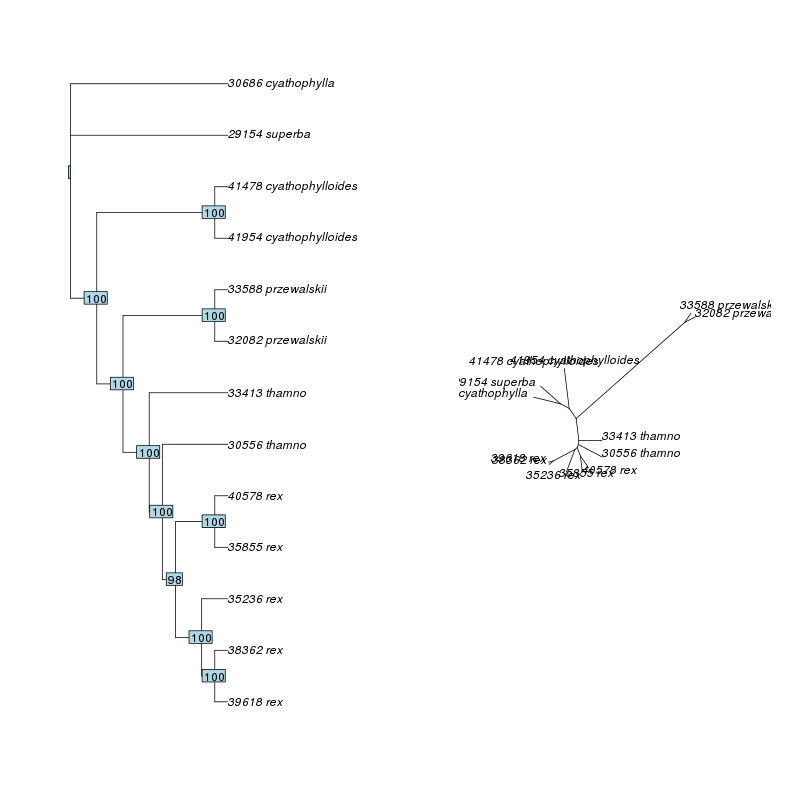

In [30]:
%%R -h 800 -w 800
library(ape)
tre <- read.tree("empirical_10/RAxML_bipartitions.empirical_10_m4")
ltre <- ladderize(tre)

par(mfrow=c(1,2))
plot(ltre, use.edge.length=F)
nodelabels(ltre$node.label)

plot(ltre, type='u')

### Get phylo distances (GTRgamma dist)

In [31]:
%%R
mean(cophenetic.phylo(ltre))


[1] 0.02792806
